In [ ]:
# importing the requied libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
#importing the data required 
car_data=pd.read_csv('/content/car data.csv')

In [ ]:
#checking the shape of data
print(car_data.shape)

(301, 9)


In [ ]:
#checking the information of data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#peinting the frist 5 lines
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#cheacking the any null values there or not
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the value counts 
print(car_data.Fuel_Type.value_counts())

print(car_data.Transmission.value_counts())

print(car_data.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [ ]:
car_data1=car_data.replace({'Seller_Type':{'Dealer':1,'Individual':0},'Transmission':{'Manual':1,'Automatic':0},'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [ ]:
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)
print(x)
y=car_data.Selling_Price
print(y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            1             1      0
1    2013           9.54       43000  ...            1             1      0
2    2017           9.85        6900  ...            1             1      0
3    2011           4.15        5200  ...            1             1      0
4    2014           6.87       42450  ...            1             1      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            1             1      0
297  2015           5.90       60000  ...            1             1      0
298  2009          11.00       87934  ...            1             1      0
299  2017          12.50        9000  ...            1             1      0
300  2016           5.90        5464  ...            1             1      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [ ]:
#splitting thr data into training  and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,1,1,1,0
249,2016,7.600,17000,1,1,1,0
277,2015,13.600,21780,1,1,1,0
194,2008,0.787,50000,1,0,1,0
244,2013,9.400,49000,2,1,1,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,1,1,1,0
22,2011,8.010,50000,1,1,0,0
72,2013,18.610,56001,1,1,1,0
15,2016,10.790,43000,2,1,1,0


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicion_value=model.predict(x_test)
accuracy=metrics.r2_score(predicion_value,y_test)
print(accuracy)

0.8062199941176301


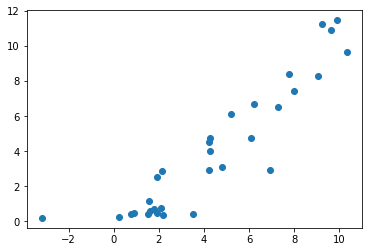

In [ ]:
plt.scatter(predicion_value,y_test)

In [ ]:
predicion_value=model.predict(x_train)
accuracy=metrics.r2_score(predicion_value,y_train)
print(accuracy)

0.8635655509198782


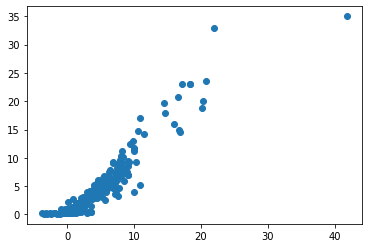

In [ ]:
plt.scatter(predicion_value,y_train)